In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.linear_model import SGDRegressor


In [22]:
df_train=pd.read_csv("house_price_train.csv")
df_train.drop("Id",axis=1,inplace=True) ## reduntatnt 
output_col=df_train['SalePrice']
df_train=df_train.drop('SalePrice',axis=1)

In [23]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [24]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [25]:
## PREPROCESSING

In [26]:
def column_with_most_reduntant_null_values(threshold,df_train:pd.DataFrame):
    null_cols=[]
    for col in df_train.columns:
        if df_train[col].isnull().sum()>=(threshold*len(df_train)):
            null_cols.append(col)
    df_train.drop(null_cols,axis=1,inplace=True)

In [27]:
column_with_most_reduntant_null_values(threshold=0.5,df_train=df_train)

In [28]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [29]:
def fill_null_values(for_numerical_cols:str,for_categorical_cols:str,df_train):
    for cols in df_train.columns:
        if df_train[cols].dtype=="int64" or df_train[cols].dtype=="float64":
            if for_numerical_cols=="median":
                median_=df_train[cols].median()
                df_train[cols].fillna(median_,inplace=True)
        elif df_train[cols].dtype=="object":
            if for_categorical_cols=="most_frequent":
                d=list(df_train[cols].value_counts().index) # most frequent
                df_train[cols].fillna(d[0],inplace=True)

In [30]:
fill_null_values(for_numerical_cols="median",for_categorical_cols="most_frequent",df_train=df_train)

In [31]:
for col in df_train.columns:
    if df_train[col].isnull().sum()>(0):

        print(col,df[col].isnull().sum(),df_train[col].dtypes)


In [32]:
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)

In [33]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

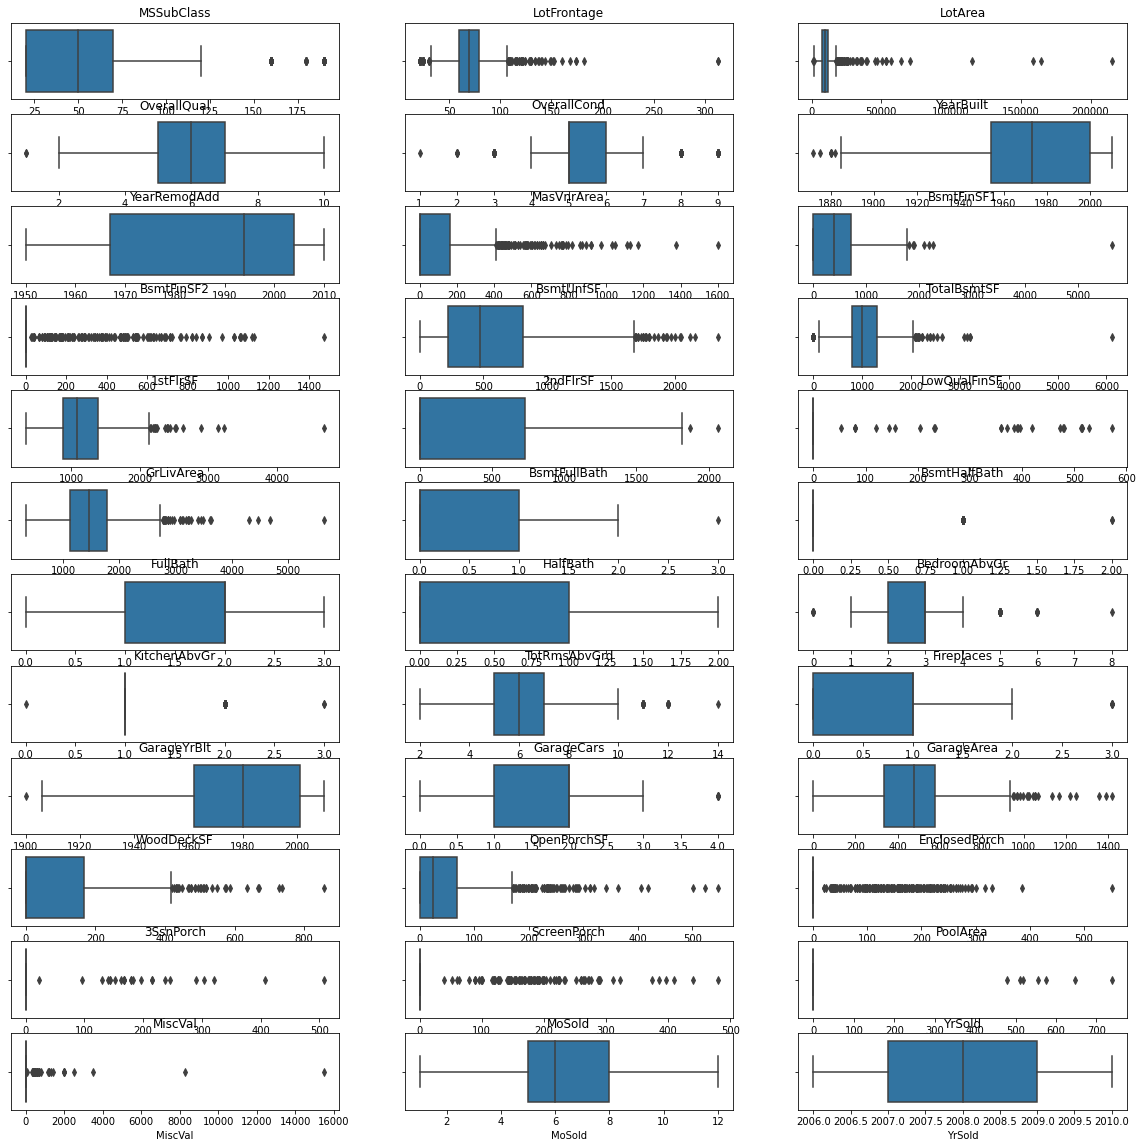

In [34]:
fig, axes = plt.subplots(nrows = 12, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 20)

for ax, col in zip(axes, continuous_cols):
    print()
    sns.boxplot(df_train[col], ax = ax)
    ax.set_title(col)

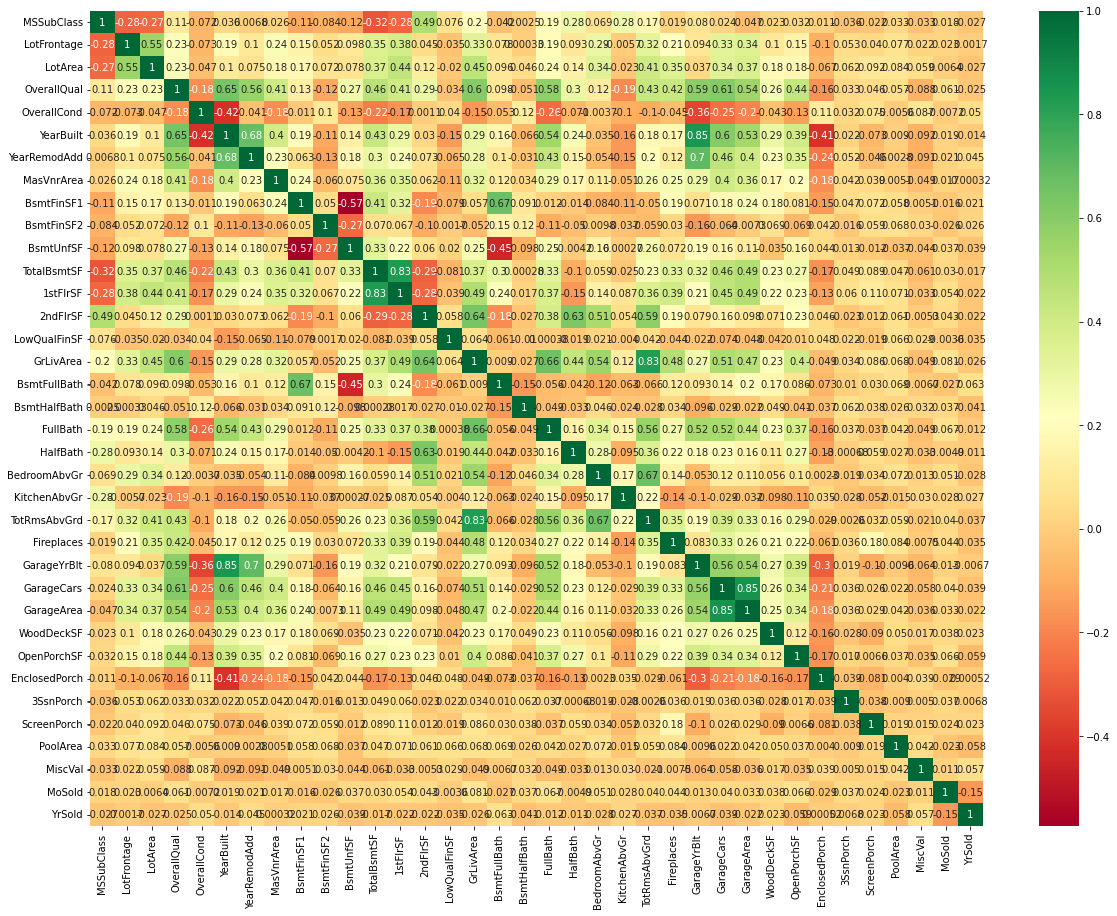

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.loc[:,continuous_cols].corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

Deleting Outliers.

Here we are deleting outliers using Inter Quartile Range Strategy. Since for a column ouliers are in a specifc row and for different columns the oulier contained rows are different and if we delete those specific row then that row in output label should also be deleted thats why we are first adding label into our features after that we will separate the label.

In [36]:
df_train=pd.concat([output_col,df_train],axis=1) # since rows will be deleted here

In [37]:
for col in continuous_cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    df_train = df_train[(df_train[col] <= h)] 
    df_train = df_train[(df_train[col] >=l)] 



[ -55.0 , 145.0 ]
[ 30.0 , 110.0 ]
[ 2440.0 , 16936.0 ]
[ 2.0 , 10.0 ]
[ 3.5 , 7.5 ]
[ 1887.0 , 2071.0 ]
[ 1909.0 , 2061.0 ]
[ -256.5 , 427.5 ]
[ -1066.5 , 1777.5 ]
[ 0.0 , 0.0 ]
[ -587.5 , 1728.5 ]
[ 132.0 , 1948.0 ]
[ 201.5 , 2021.5 ]
[ -1111.5 , 1852.5 ]
[ 0.0 , 0.0 ]
[ 253.0 , 2597.0 ]
[ -1.5 , 2.5 ]
[ 0.0 , 0.0 ]
[ -0.5 , 3.5 ]
[ -1.5 , 2.5 ]
[ 0.5 , 4.5 ]
[ 1.0 , 1.0 ]
[ 2.0 , 10.0 ]
[ -1.5 , 2.5 ]
[ 1904.875 , 2061.875 ]
[ -0.5 , 3.5 ]
[ -13.25 , 928.75 ]
[ -237.0 , 395.0 ]
[ -99.0 , 165.0 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ 0.5 , 12.5 ]
[ 2004.0 , 2012.0 ]


In [38]:
output_col=df_train['SalePrice']
df_train.drop("SalePrice",axis=1,inplace=True)

In [39]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,0,8,2007,WD,Normal
10,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,20,RL,63.0,8500,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,60,0,0,0,0,0,11,2007,WD,Normal
1448,50,RL,70.0,11767,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,5,2007,WD,Normal
1451,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,5,2009,New,Partial
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,113,0,0,0,0,0,10,2009,WD,Normal


Here we are encoding our categorical columns using 'one_hot_encoding' as a strategy. We will be experimenting other strategies later.

In [40]:

def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    if strategy=="onehotencoder":
        one_hot_encoded=pd.get_dummies(df_categorical)
        # print(one_hot_encoded)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        df_train=pd.concat([df_train,one_hot_encoded],axis=1)
    return df_train

In [41]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=categorical_cols,strategy="onehotencoder")

In [42]:
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,0,1,0,0,0,1,0
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,20,63.0,8500,7,5,2004,2004,106.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1448,50,70.0,11767,4,7,1910,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1451,20,78.0,9262,8,5,2008,2009,194.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
df_train.loc[:,continuous_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.0,...,559.000000,559.000000,559.000000,559.0,559.0,559.0,559.0,559.0,559.000000,559.000000
mean,48.962433,68.645796,9142.640429,6.282648,5.363148,1983.608229,1989.536673,77.082290,442.545617,0.0,...,481.797853,91.042934,40.939177,0.0,0.0,0.0,0.0,0.0,6.345259,2007.788909
std,31.487843,13.579836,2602.453686,1.279380,0.702378,25.196973,19.559348,108.084049,408.936304,0.0,...,187.865573,97.302865,44.353378,0.0,0.0,0.0,0.0,0.0,2.649259,1.317848
min,20.000000,30.000000,2887.000000,2.000000,4.000000,1910.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000
25%,20.000000,61.000000,7746.000000,5.000000,5.000000,1966.000000,1973.500000,0.000000,0.000000,0.0,...,391.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000
50%,50.000000,69.000000,9017.000000,6.000000,5.000000,1996.000000,1999.000000,0.000000,438.000000,0.0,...,480.000000,100.000000,33.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000
75%,60.000000,75.000000,10774.500000,7.000000,6.000000,2004.000000,2005.000000,147.000000,741.000000,0.0,...,578.000000,168.000000,64.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000
max,120.000000,109.000000,16770.000000,10.000000,7.000000,2009.000000,2010.000000,423.000000,1619.000000,0.0,...,928.000000,379.000000,162.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000


Taking features in X and lables in Y

In [44]:
X=df_train
Y=output_col

The below dictionary will save the final accuracies of each model.

In [98]:
for i in range(100):
    model=RandomForestRegressor()
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=None,shuffle=True)

    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)

    r2=model.score(X_test,Y_test)

    adjusted_r2=1-(((1-r2_score(Y_test, predicted))*(len(Y_test)-1))/(len(Y_test)-X_test.shape[1]-1))
    r2
    print(adjusted_r2,r2)

1.4557189693756802 0.8635571947977005
1.497754554801117 0.8509716901793063
1.253886978184832 0.9239859346752
1.414586023682624 0.8758724479992144
1.4299950042455105 0.8712589807648172
1.6065166797339026 0.8184081797203885
1.335512653774661 0.8995471096483051
1.474843790408891 0.85783120047638
1.3393608188813528 0.8983949644067806
1.358717204698867 0.8925996393117165
1.383758775574826 0.8851021630015491
1.3995262937086501 0.8803813491890269
1.3110117302048232 0.906882715507538
1.4398613601775525 0.8683049819827687
1.6000211986337072 0.8203529345408063
1.2676544521674613 0.919863936476808
1.38553237985503 0.884571143755979
1.4537112390119886 0.8641583116730573
1.315127310424914 0.9056505058608042
1.5615535336234334 0.8318701995139421
1.4438295447709772 0.8671169027631804
1.397632341216191 0.8809484008334757
1.3846997181153538 0.8848204436780378
1.3204828067887844 0.9040470638356933
1.4640867609627544 0.8610518679752233
1.3269309866960948 0.9021164710490734
1.489657755778623 0.85339588150

In [45]:
final_accuracies={}
algorithms_tested=["LinearRegression()","RandomForestRegressor()","SVR()","KNeighborsRegressor()","SGDRegressor()","DecisionTreeRegressor()","ElasticNet()","Lasso()","Ridge()"]
for al in algorithms_tested:
    final_accuracies[al]=0

In [46]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
   
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    r2=evaluation_metric(Y_test, predicted)
    print(f"Testing r2_score of {model} is ",r2)
    print(f"Training r2_score of {model} is ", model.score(X_train,Y_train))
    if final_accuracies[algo]<r2:
        
        final_accuracies[algo]=r2


In [80]:
algo_testing(algo="LinearRegression()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of LinearRegression() is  0.8900251824534953
Training r2_score of LinearRegression() is  0.9592217997015475


In [96]:
algo_testing(algo="RandomForestRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of RandomForestRegressor() is  0.9240402785474628
Training r2_score of RandomForestRegressor() is  0.9835697942643844


In [49]:
algo_testing(algo="SVR()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of SVR() is  -0.005480197293721956
Training r2_score of SVR() is  -0.009256441872547594


In [50]:
algo_testing(algo="KNeighborsRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of KNeighborsRegressor() is  0.5653861623707991
Training r2_score of KNeighborsRegressor() is  0.7899654007843996


In [51]:
algo_testing(algo="SGDRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of SGDRegressor() is  -1.1489210889362471e+23
Training r2_score of SGDRegressor() is  -8.136194656051083e+22


In [52]:
algo_testing(algo="DecisionTreeRegressor()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of DecisionTreeRegressor() is  0.8495571589027455
Training r2_score of DecisionTreeRegressor() is  1.0


In [53]:
algo_testing(algo="ElasticNet()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of ElasticNet() is  0.8044058199585324
Training r2_score of ElasticNet() is  0.9179483161586535


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.925e+10, tolerance: 1.639e+08
  model = cd_fast.enet_coordinate_descent(


In [54]:
algo_testing(algo="Lasso()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of Lasso() is  0.902216349593525
Training r2_score of Lasso() is  0.9573951703740156


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.307e+10, tolerance: 1.540e+08
  model = cd_fast.enet_coordinate_descent(


In [55]:
algo_testing(algo="Ridge()",test_size=0.2,X=X,Y=Y,evaluation_metric="r2_score",random_state=None,shuffle=True)

Testing r2_score of Ridge() is  0.8873086603199668
Training r2_score of Ridge() is  0.9616079186139481


In [56]:
final_accuracies

{LinearRegression(): 0.896086381710118,
 RandomForestRegressor(): 0.8576220964180536,
 SVR(): -0.005480197293721956,
 KNeighborsRegressor(): 0.5653861623707991,
 SGDRegressor(): -1.1489210889362471e+23,
 DecisionTreeRegressor(): 0.8495571589027455,
 ElasticNet(): 0.8044058199585324,
 Lasso(): 0.902216349593525,
 Ridge(): 0.8873086603199668}